In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import pickle

In [3]:
heart_disease = pd.read_csv('Heart_Disease_Prediction.csv')
heart_disease.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [4]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [5]:
heart_disease.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


<Axes: >

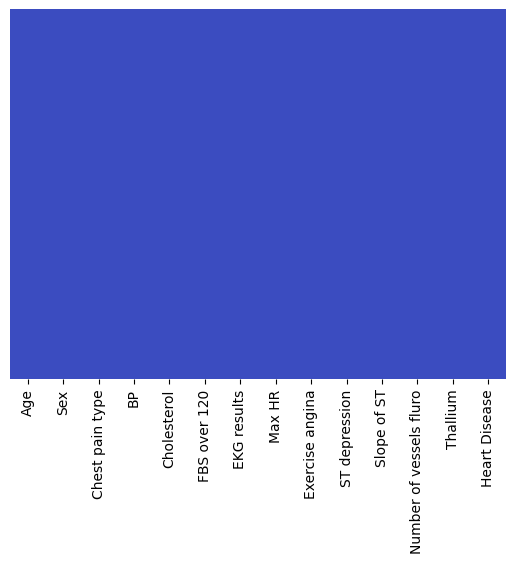

In [6]:
sns.heatmap(heart_disease.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [7]:
# sns.pairplot(heart_disease,hue='Sex')

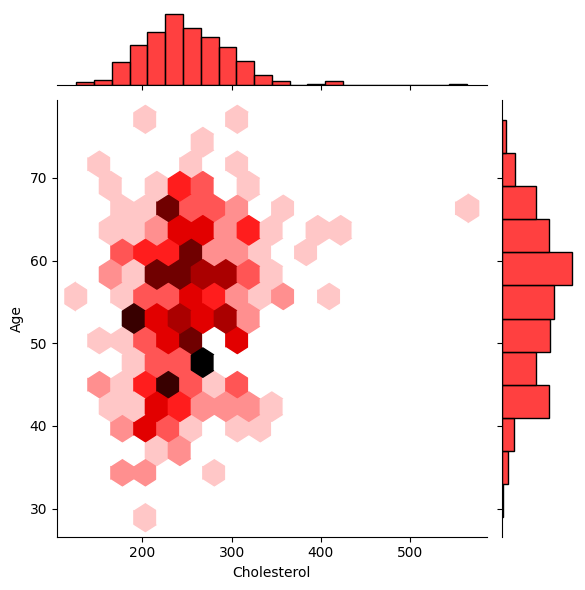

In [8]:
sns.jointplot(x='Cholesterol',y='Age',data=heart_disease,color=
              'red',kind='hex')

In [9]:
final_data = pd.get_dummies(heart_disease['Heart Disease'],drop_first=True).astype(int)
final_data.head()

,Presence
0,1
1,0
2,1
3,0
4,0


In [10]:
train = pd.concat([heart_disease,final_data],axis=1)
train.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease,Presence
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence,0


In [11]:
train1 = train.drop('Heart Disease',axis=1)
train1.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Presence
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


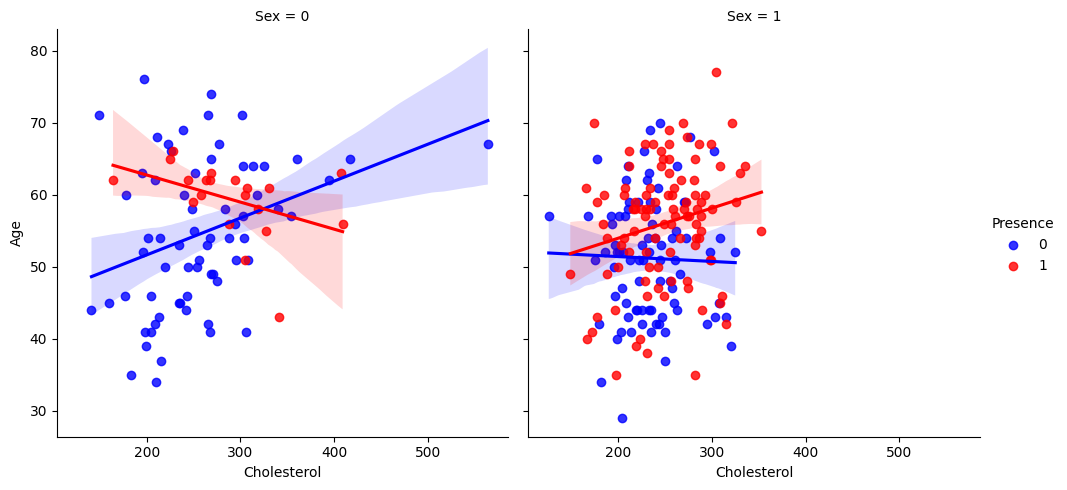

In [12]:
set1 = ['blue', 'red']
sns.lmplot(y='Age', x='Cholesterol', data=train1, hue='Presence',col='Sex',palette=set1)
plt.show()


In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()

In [15]:
scaled_features = scaler.fit_transform(train1.drop('Presence',axis=1))

In [16]:
df_feat = pd.DataFrame(scaled_features,columns=train1.columns[:-1])
df_feat.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
0,1.712094,0.689500,0.870928,-0.075410,1.402212,-0.417029,0.981664,-1.759208,-0.701222,1.181012,0.676419,2.472682,-0.875706
1,1.382140,-1.450327,-0.183559,-0.916759,6.093004,-0.417029,0.981664,0.446409,-0.701222,0.481153,0.676419,-0.711535,1.189277
2,0.282294,0.689500,-1.238045,-0.411950,0.219823,-0.417029,-1.026285,-0.375291,-0.701222,-0.656118,-0.954234,-0.711535,1.189277
3,1.052186,0.689500,0.870928,-0.187590,0.258589,-0.417029,-1.026285,-1.932198,1.426081,-0.743600,0.676419,0.349871,1.189277
4,2.152032,-1.450327,-1.238045,-0.636310,0.374890,-0.417029,0.981664,-1.240239,1.426081,-0.743600,-0.954234,0.349871,-0.875706


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x = train1.drop('Presence',axis=1)
y = train1['Presence']

In [19]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3,random_state=101)

# Decision Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
dtree = DecisionTreeClassifier(max_depth=3)

In [22]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

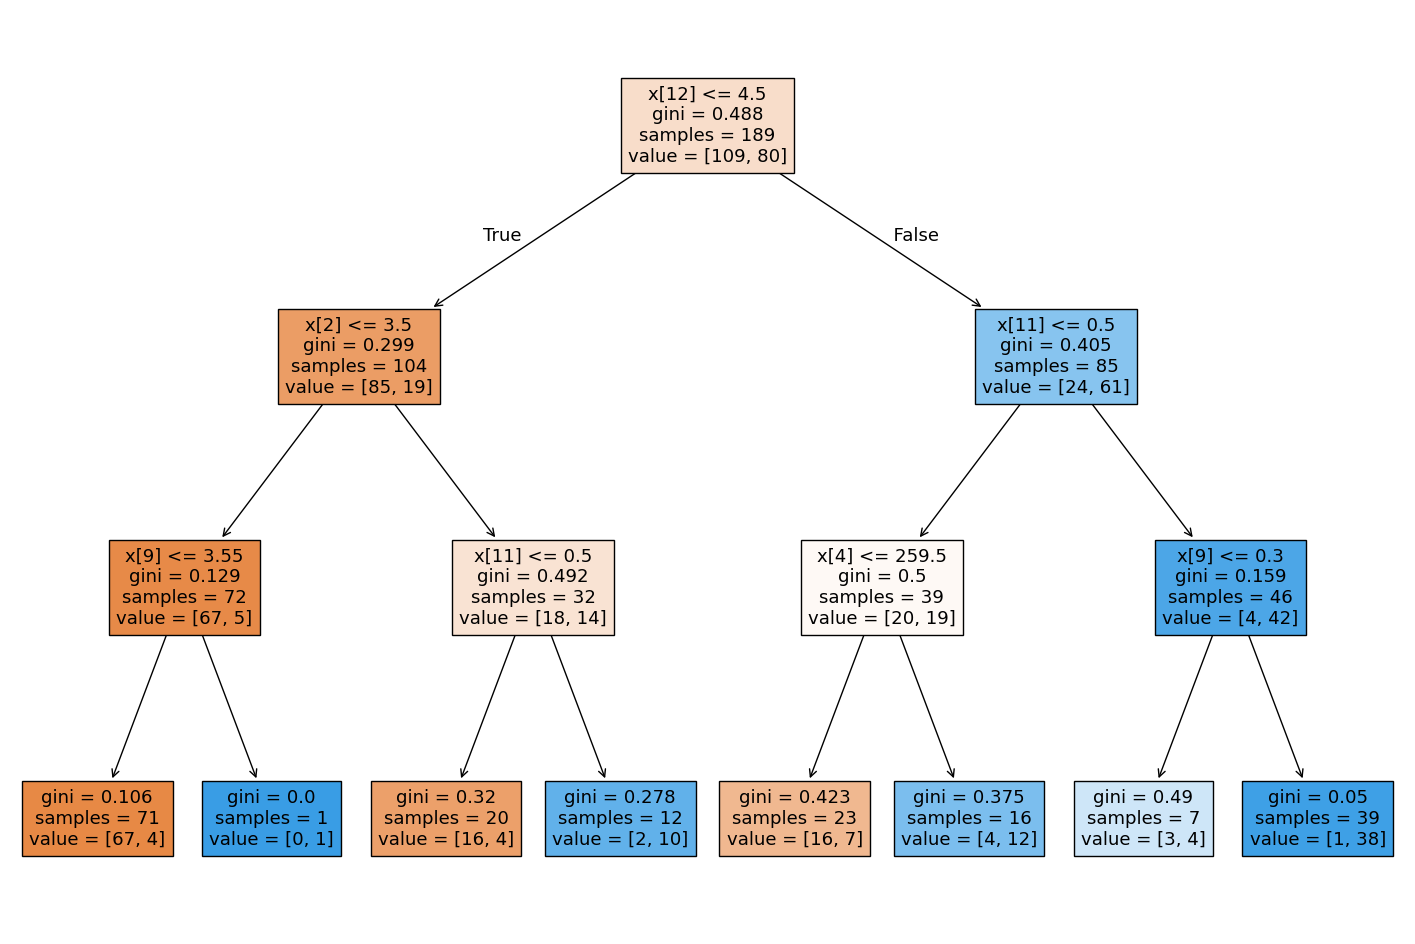

In [23]:
from sklearn import tree
plt.figure(figsize=(18,12))
tree.plot_tree(dtree,filled=True)
plt.show()

In [24]:
prediction = dtree.predict(x_test)

In [25]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [26]:
accuracy_score(y_test,prediction)

0.7654320987654321

In [27]:
confusion_matrix(y_test,prediction)

array([[36,  5],
       [14, 26]], dtype=int64)

In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
parameter = {
    'criterion': ['gini','entropy','log_loss'],
    'splitter': ['best','random'],
    'max_depth':[1,2,3,4,5],
    'max_features': ['auto','sqrt','log2'],
    }

In [30]:
cv = GridSearchCV(dtree,param_grid=parameter,cv=5,scoring='accuracy')

In [31]:
cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=3),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [32]:
cv.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [33]:
predict = cv.predict(x_test)

In [34]:
accuracy_score(y_test,predict)

0.8024691358024691

In [35]:
print(classification_report(y_test,predict))
print(" ")
confusion_matrix(y_test,predict)

              precision    recall  f1-score   support

           0       0.77      0.88      0.82        41
           1       0.85      0.72      0.78        40

    accuracy                           0.80        81
   macro avg       0.81      0.80      0.80        81
weighted avg       0.81      0.80      0.80        81

 


array([[36,  5],
       [11, 29]], dtype=int64)

# Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
rfc = RandomForestClassifier(n_estimators=200)

In [38]:
param_grid = {
    'n_estimators': [50, 100, 200, 300, 500] 
}

In [39]:
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring='accuracy')

In [40]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=200),
             param_grid={'n_estimators': [50, 100, 200, 300, 500]},
             scoring='accuracy')

In [41]:
best_n_estimators = grid_search.best_params_['n_estimators']
print(f'Best n_estimators: {best_n_estimators}')

Best n_estimators: 100


In [42]:
predict2 = grid_search.predict(x_test)

In [43]:
accuracy_score(y_test,predict2)

0.8024691358024691

In [44]:
cm5 = confusion_matrix(y_test,predict2)

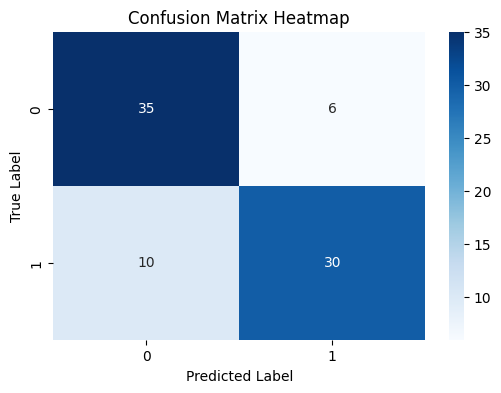

In [45]:
plt.figure(figsize=(6, 4))  
sns.heatmap(cm5, annot=True, fmt="g", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [46]:
report4 = classification_report(y_test,predict2,output_dict=True)

In [47]:
report_df3 = pd.DataFrame(report4).transpose()
report_df3 = report_df3.drop(columns=['support'],axis=1)

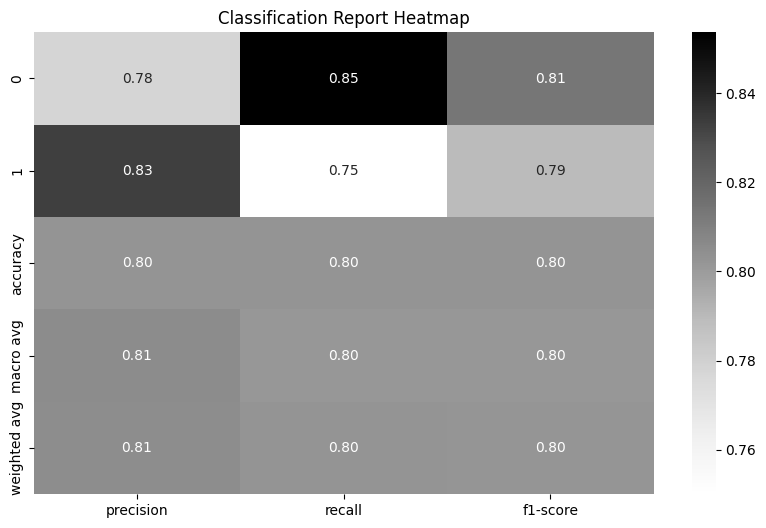

In [48]:
plt.figure(figsize=(10, 6))
sns.heatmap(report_df3, annot=True, cmap="Greys", fmt='.2f')
plt.title("Classification Report Heatmap")
plt.show()

# Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
logmodel = LogisticRegression()

In [51]:
logmodel.fit(x_train,y_train)

LogisticRegression()

In [52]:
with open("model.pkl", "wb") as file:
    pickle.dump(logmodel, file)
print("Model saved as model.pkl")

Model saved as model.pkl


In [53]:
with open('model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [54]:
predict3 = logmodel.predict(x_test)

In [55]:
accuracy_score(y_test,predict3)

0.8641975308641975

In [56]:
cm = confusion_matrix(y_test,predict3)

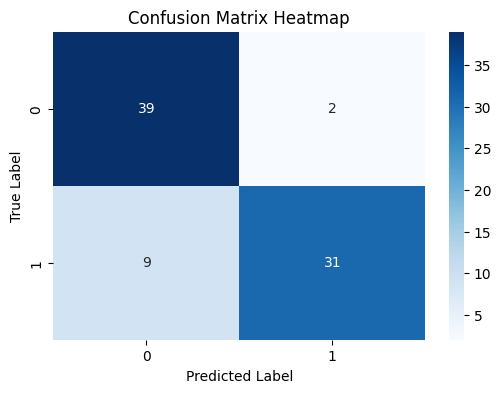

In [57]:
plt.figure(figsize=(6, 4))  
sns.heatmap(cm, annot=True, fmt="g", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [58]:
report=classification_report(y_test,predict3,output_dict=True)

In [59]:
report_df = pd.DataFrame(report).transpose()
report_df = report_df.drop(columns=['support'],axis=1)

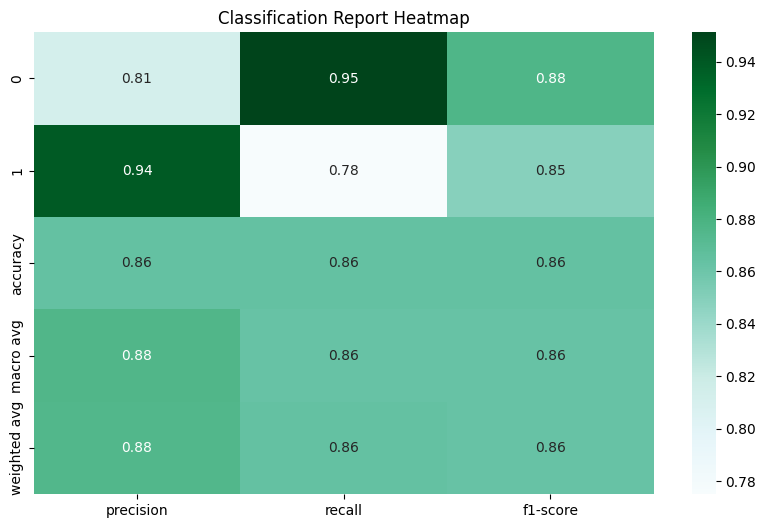

In [60]:
plt.figure(figsize=(10, 6))
sns.heatmap(report_df, annot=True, cmap="BuGn", fmt='.2f')
plt.title("Classification Report Heatmap")
plt.show()

# KNN

In [61]:
from sklearn.neighbors import KNeighborsClassifier

In [62]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    predict_i = knn.predict(x_test)
    error_rate.append(np.mean(predict_i != y_test))


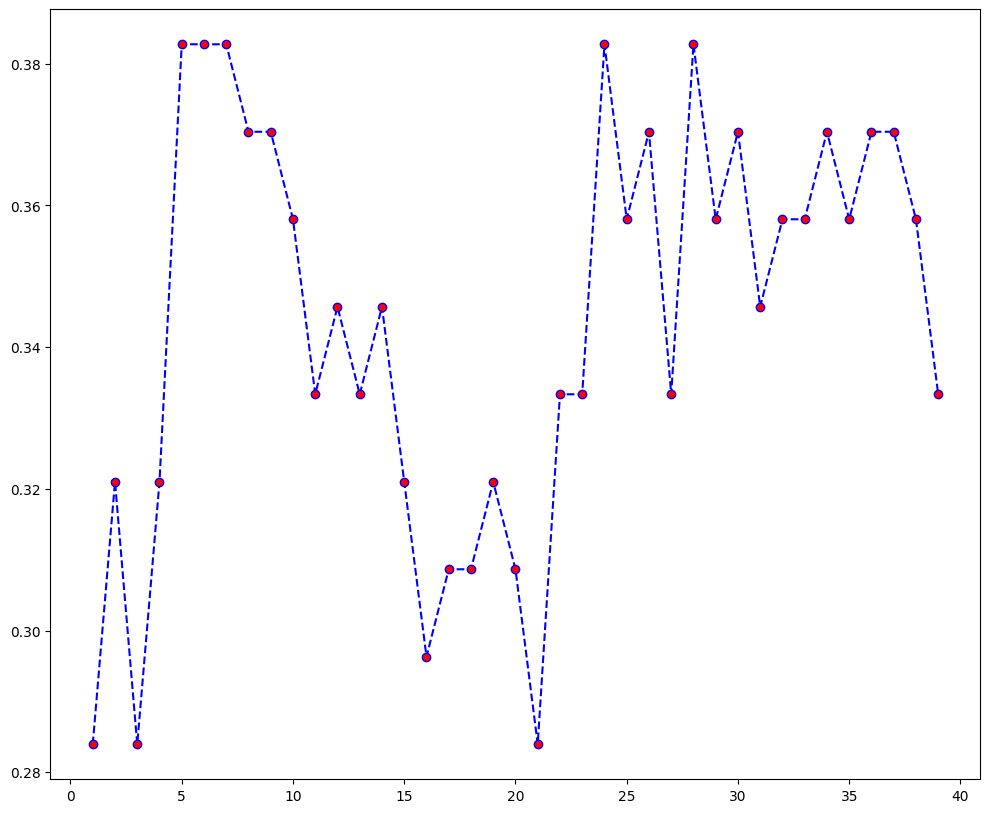

In [63]:
plt.figure(figsize=(12,10))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red')

In [64]:
knn = KNeighborsClassifier(n_neighbors=1)

In [65]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [66]:
predict4 = knn.predict(x_test)

In [67]:
accuracy_score(y_test,predict4)

0.7160493827160493

In [68]:
print(classification_report(y_test,predict4))

              precision    recall  f1-score   support

           0       0.68      0.83      0.75        41
           1       0.77      0.60      0.68        40

    accuracy                           0.72        81
   macro avg       0.73      0.71      0.71        81
weighted avg       0.73      0.72      0.71        81



In [69]:
confusion_matrix(y_test,predict4)

array([[34,  7],
       [16, 24]], dtype=int64)

In [70]:
param_grid = {'C':[0,1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}

# SVC

In [71]:
from sklearn.svm import SVC

In [72]:
model = SVC()

In [73]:
grid = GridSearchCV(model,param_grid,verbose=3)

In [74]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END ........................C=0, gamma=1;, score=nan total time=   0.0s
[CV 2/5] END ........................C=0, gamma=1;, score=nan total time=   0.0s
[CV 3/5] END ........................C=0, gamma=1;, score=nan total time=   0.0s
[CV 4/5] END ........................C=0, gamma=1;, score=nan total time=   0.0s
[CV 5/5] END ........................C=0, gamma=1;, score=nan total time=   0.0s
[CV 1/5] END ......................C=0, gamma=0.1;, score=nan total time=   0.0s
[CV 2/5] END ......................C=0, gamma=0.1;, score=nan total time=   0.0s
[CV 3/5] END ......................C=0, gamma=0.1;, score=nan total time=   0.0s
[CV 4/5] END ......................C=0, gamma=0.1;, score=nan total time=   0.0s
[CV 5/5] END ......................C=0, gamma=0.1;, score=nan total time=   0.0s
[CV 1/5] END .....................C=0, gamma=0.01;, score=nan total time=   0.0s
[CV 2/5] END .....................C=0, gamma=0.

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0, 1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [75]:
grid.best_params_

{'C': 100, 'gamma': 0.0001}

In [76]:
grid_predict = grid.predict(x_test)

In [77]:
accuracy_score(y_test,grid_predict)

0.7530864197530864

In [78]:
confusion_matrix(y_test,grid_predict)

array([[34,  7],
       [13, 27]], dtype=int64)

In [79]:
print(classification_report(y_test,grid_predict))

              precision    recall  f1-score   support

           0       0.72      0.83      0.77        41
           1       0.79      0.68      0.73        40

    accuracy                           0.75        81
   macro avg       0.76      0.75      0.75        81
weighted avg       0.76      0.75      0.75        81



# AdaBoost

In [80]:
from sklearn.ensemble import AdaBoostClassifier

In [81]:
Adamodel = AdaBoostClassifier(n_estimators=100,learning_rate=1)

In [82]:
Adamodel.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=100)

In [83]:
Ada_predict = Adamodel.predict(x_test)

In [84]:
accuracy_score(y_test,Ada_predict)

0.7901234567901234

In [85]:
confusion_matrix(y_test,Ada_predict)

array([[32,  9],
       [ 8, 32]], dtype=int64)

In [86]:
print(classification_report(y_test,Ada_predict))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.78      0.80      0.79        40

    accuracy                           0.79        81
   macro avg       0.79      0.79      0.79        81
weighted avg       0.79      0.79      0.79        81



In [87]:
Adamodel2 =AdaBoostClassifier(n_estimators=100,estimator=logmodel,learning_rate=1)

In [88]:
Adamodel2.fit(x_train,y_train)

AdaBoostClassifier(estimator=LogisticRegression(), learning_rate=1,
                   n_estimators=100)

In [89]:
Ada_predict2 = Adamodel2.predict(x_test)

In [90]:
accuracy_score(y_test,Ada_predict2)

0.8395061728395061

In [91]:
print(classification_report(y_test,Ada_predict2))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85        41
           1       0.89      0.78      0.83        40

    accuracy                           0.84        81
   macro avg       0.85      0.84      0.84        81
weighted avg       0.84      0.84      0.84        81



# GradientBoost

In [92]:
from sklearn.ensemble import GradientBoostingClassifier

In [93]:
gradient = GradientBoostingClassifier()

In [94]:
parameter2 = { 'learning_rate':[0.15,0.10,0.5,0.001,0.005,1],
             'n_estimators':[30,50,100,200,250],
              'max_depth':[3,4,5,6,7],
              'min_samples_split':[7,8,9,10,12]}

In [95]:
cv= GridSearchCV(gradient,param_grid=parameter2,scoring='accuracy')

In [96]:
cv.fit(x_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.15, 0.1, 0.5, 0.001, 0.005, 1],
                         'max_depth': [3, 4, 5, 6, 7],
                         'min_samples_split': [7, 8, 9, 10, 12],
                         'n_estimators': [30, 50, 100, 200, 250]},
             scoring='accuracy')

In [97]:
cv.best_params_

{'learning_rate': 0.15,
 'max_depth': 4,
 'min_samples_split': 8,
 'n_estimators': 50}

In [98]:
predict_gradient = cv.predict(x_test)

In [99]:
accuracy_score(y_test,predict_gradient)

0.7901234567901234

In [100]:
print(classification_report(y_test,predict_gradient))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80        41
           1       0.83      0.72      0.77        40

    accuracy                           0.79        81
   macro avg       0.79      0.79      0.79        81
weighted avg       0.79      0.79      0.79        81



In [101]:
confusion_matrix(y_test,predict_gradient)

array([[35,  6],
       [11, 29]], dtype=int64)

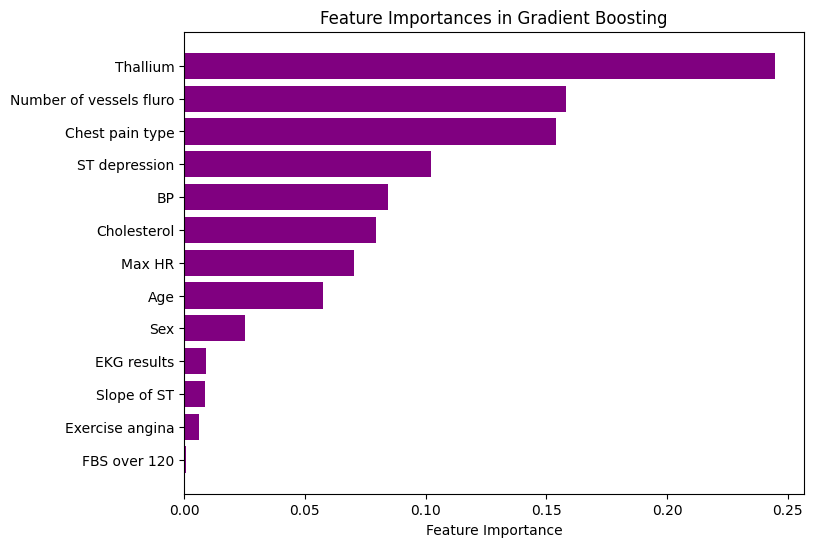

In [102]:
best_model = cv.best_estimator_
feature_importances = best_model.feature_importances_  
features = x_train.columns  
indices = np.argsort(feature_importances)
plt.figure(figsize=(8, 6))
plt.barh(range(len(indices)), feature_importances[indices], align='center', color='purple')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Feature Importance')
plt.title('Feature Importances in Gradient Boosting')
plt.show()


# XGboost

In [103]:
from xgboost import XGBClassifier

In [104]:
xgb = XGBClassifier()

In [105]:
parameter3 = {
              'eta':[0.01,0.10,0.02,0.025,0.03],
             'n_estimators':[30,50,100,200,250],
              'max_depth':[3,4,5,6,7],
              'lambda': [0.01,1,3,5,8]}

In [106]:
# xgb_search= GridSearchCV(xgb,param_grid=parameter3,scoring='accuracy')

In [107]:
# xgb_search.fit(x_train,y_train)

In [108]:
xgb_search.best_params_

NameError: name 'xgb_search' is not defined

In [ ]:
xgb_predict = xgb_search.predict(x_test)

In [ ]:
accuracy_score(y_test,xgb_predict)

In [ ]:
report2 = classification_report(y_test,xgb_predict,output_dict=True)

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(report_df, annot=True, cmap="terrain", fmt='.2f')
plt.title("Classification Report Heatmap")
plt.show()

In [ ]:
cm2 = confusion_matrix(y_test,xgb_predict)

In [ ]:
plt.figure(figsize=(6, 4))  
sns.heatmap(cm2, annot=True, fmt="g", cmap="Set1", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [ ]:
best_model = xgb_search.best_estimator_
feature_importances = best_model.feature_importances_  
features = x_train.columns  
indices = np.argsort(feature_importances)
plt.figure(figsize=(8, 6))
plt.barh(range(len(indices)), feature_importances[indices], align='center', color='purple')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Feature Importance')
plt.title('Feature Importances in XG Boosting')
plt.show()

In [ ]:
n_estimators_range = range(10,250,10)
accuracy_scores= []

In [ ]:
for n in n_estimators_range:
    model = XGBClassifier(n_estimators=n, use_label_encoder=False, eval_metric='mlogloss')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

In [ ]:
plt.plot(n_estimators_range, accuracy_scores, marker='o',color='green')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs n_estimators in XGBoost')
plt.grid(True)
plt.show()